In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
health = pd.read_csv('fetal_health.csv')
health_copy = health.copy()
health.head(5)

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [ ]:
health.columns

Index(['baseline value', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations', 'severe_decelerations',
       'prolongued_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability', 'histogram_width',
       'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
       'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean',
       'histogram_median', 'histogram_variance', 'histogram_tendency',
       'fetal_health'],
      dtype='object')

In [6]:
X = health.iloc[:, :-1].values
y = health.iloc[:, -1].values

In [8]:
y

array([2., 1., 1., ..., 2., 2., 1.])

In [9]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_scaled = sc.fit_transform(X)


In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.25, random_state = 0)

In [11]:
X_scaled

array([[-1.35222005, -0.8223883 , -0.20320955, ..., -1.18164215,
         1.87056871,  1.11298001],
       [-0.1325256 ,  0.73013282, -0.20320955, ...,  0.13203796,
        -0.23499819, -0.52452553],
       [-0.03088439, -0.04612774, -0.20320955, ..., -0.00624416,
        -0.2004807 , -0.52452553],
       ...,
       [ 0.68060404, -0.56363478, -0.20320955, ...,  0.96173066,
        -0.51113811,  1.11298001],
       [ 0.68060404, -0.56363478, -0.20320955, ...,  0.8925896 ,
        -0.51113811,  1.11298001],
       [ 0.88388645, -0.30488126, -0.16034157, ...,  0.47774325,
        -0.61469058, -0.52452553]])

In [12]:
from sklearn.svm import SVC

In [13]:
model_C1 = SVC(C=1)
model_C1.fit(X_train, y_train)
clf_c1 = model_C1.fit(X_train, y_train)
model_C1.score(X_test, y_test)

0.9060150375939849

In [14]:
model_C10 = SVC(C=10)
model_C10.fit(X_train, y_train)
clf_c10 = model_C10.fit(X_train, y_train)
model_C10.score(X_test, y_test)

0.9229323308270677

In [15]:
model_C50 = SVC(C=50)
model_C50.fit(X_train, y_train)
clf_c50 = model_C50.fit(X_train, y_train)
model_C50.score(X_test, y_test)

0.9229323308270677

In [16]:
from sklearn.model_selection import cross_val_score

In [17]:
scores1 = cross_val_score(model_C1,X,y, cv=10)
np.average(scores1)

0.8410178049428648

In [18]:
scores10 = cross_val_score(model_C10,X,y, cv=10)
np.average(scores10)

0.8498693418371867

In [19]:
scores50 = cross_val_score(model_C50,X,y, cv=10)
np.average(scores50)

0.8465718841349987

In [20]:
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(SVC(gamma='auto'), {
    'C': [1,10,50],
    'kernel': ['rbf','linear']
}, cv=5, return_train_score=False)
clf.fit(X_scaled,y)
clf.cv_results_

{'mean_fit_time': array([0.05702829, 0.04652314, 0.0519362 , 0.13078723, 0.05181084,
        0.61469221]),
 'mean_score_time': array([0.01805406, 0.00560021, 0.0149384 , 0.00499692, 0.01313639,
        0.00514355]),
 'mean_test_score': array([0.84572328, 0.84148688, 0.84055012, 0.84054681, 0.83772549,
        0.84148799]),
 'param_C': masked_array(data=[1, 1, 10, 10, 50, 50],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_kernel': masked_array(data=['rbf', 'linear', 'rbf', 'linear', 'rbf', 'linear'],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 1, 'kernel': 'rbf'},
  {'C': 1, 'kernel': 'linear'},
  {'C': 10, 'kernel': 'rbf'},
  {'C': 10, 'kernel': 'linear'},
  {'C': 50, 'kernel': 'rbf'},
  {'C': 50, 'kernel': 'linear'}],
 'rank_test_score': array([1, 3, 4, 5, 6, 2], dtype=int32),
 'split0_test_score': array([0.83802817, 0.84

In [21]:
df = pd.DataFrame(clf.cv_results_)
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.057028,0.003057,0.018054,0.001126,1,rbf,"{'C': 1, 'kernel': 'rbf'}",0.838028,0.861176,0.910588,0.877647,0.741176,0.845723,0.057367,1
1,0.046523,0.004468,0.005600,0.000691,1,linear,"{'C': 1, 'kernel': 'linear'}",0.840376,0.854118,0.908235,0.889412,0.715294,0.841487,0.067583,3
2,0.051936,0.003903,0.014938,0.000755,10,rbf,"{'C': 10, 'kernel': 'rbf'}",0.830986,0.861176,0.912941,0.875294,0.722353,0.840550,0.064707,4
3,0.130787,0.010510,0.004997,0.000357,10,linear,"{'C': 10, 'kernel': 'linear'}",0.838028,0.858824,0.905882,0.889412,0.710588,0.840547,0.069117,5
4,0.051811,0.004009,0.013136,0.000616,50,rbf,"{'C': 50, 'kernel': 'rbf'}",0.833333,0.865882,0.910588,0.863529,0.715294,0.837725,0.065994,6
5,0.614692,0.152255,0.005144,0.000554,50,linear,"{'C': 50, 'kernel': 'linear'}",0.838028,0.861176,0.905882,0.891765,0.710588,0.841488,0.069583,2


In [22]:
df[['param_C','param_kernel','mean_test_score']]

,param_C,param_kernel,mean_test_score
0,1,rbf,0.845723
1,1,linear,0.841487
2,10,rbf,0.840550
3,10,linear,0.840547
4,50,rbf,0.837725
5,50,linear,0.841488


In [23]:
from sklearn.model_selection import RandomizedSearchCV
rs = RandomizedSearchCV(SVC(), {
        'C': [1,10,50],
        'kernel': ['rbf','linear']
    }, 
    cv=5, 
    return_train_score=False, 
    n_iter=2
)
rs.fit(X_scaled,y)
pd.DataFrame(rs.cv_results_)[['param_C','param_kernel','mean_test_score']]

,param_C,param_kernel,mean_test_score
0,1,rbf,0.845722
1,50,rbf,0.838198


In [24]:
def plot_points(features, labels):
    X = np.array(features)
    y = np.array(labels)
    spam = X[np.argwhere(y==1)]
    ham = X[np.argwhere(y==2)]
    star = X[np.argwhere(y==3)]
    plt.scatter([s[0][0] for s in spam],
                   [s[0][1] for s in spam],
                   s = 25,
                   color = 'cyan',
                   edgecolor = 'k',
                   marker = '^')
    plt.scatter([s[0][0] for s in ham],
                   [s[0][1] for s in ham],
                   s = 25,
                   color = 'red',
                   edgecolor = 'k',
                   marker = 's')
    plt.scatter([s[0][0] for s in star],
                   [s[0][1] for s in star],
                   s = 25,
                   color = 'yellow',
                   edgecolor = 'k',
                   marker = 's')
    plt.xlabel('X_test')
    plt.ylabel('Y_test')
    plt.legend(['label 2','label 1','label 0'])

# def plot_model(X, y, model):
#     X = np.array(X)
#     y = np.array(y)
#     plot_step = 0.01
#     x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
#     y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
#     xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
#                          np.arange(y_min, y_max, plot_step))
#     Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
#     Z = Z.reshape(xx.shape)
#     pyplot.contour(xx, yy, Z,colors = 'k',linewidths = 3)
#     plot_points(X, y)
#     pyplot.contourf(xx, yy, Z, colors=['red', 'blue'], alpha=0.2, levels=range(-1,2))
#     pyplot.show()

SVM with C = 1

Accuracy    :  0.9060150375939849
Recall      :  0.8033604336043361
Precision   :  0.8560185393436259
Confusion Matrix:  [[395  12   3]
 [ 23  48   1]
 [  5   6  39]]


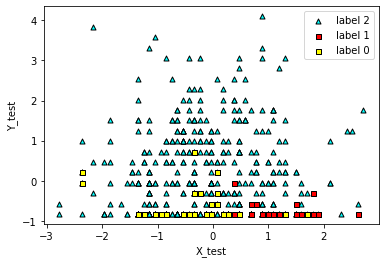

In [38]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix
y_pred_c1 = model_C1.predict(X_test)
plot_points(X_test, y_pred_c1)
accuracy = accuracy_score(y_test, y_pred_c1)
recall = recall_score(y_test, y_pred_c1, average="macro")
precision = precision_score(y_test, y_pred_c1,average="macro")
cf_matrix = confusion_matrix(y_test, y_pred_c1)

print("Accuracy    : ", accuracy)
print("Recall      : ", recall)
print("Precision   : ", precision)
print("Confusion Matrix: ", cf_matrix)

SVM with C = 10

Accuracy    :  0.9229323308270677
Recall      :  0.8414679313459801
Precision   :  0.8763292728967786
Confusion Matrix:  [[397  10   3]
 [ 18  53   1]
 [  3   6  41]]


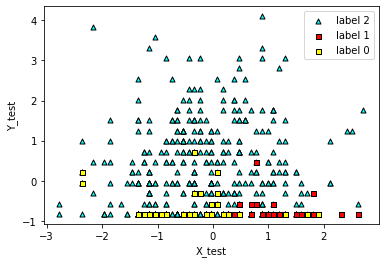

In [42]:
y_pred_c10 = model_C10.predict(X_test)
plot_points(X_test, y_pred_c10)
accuracy = accuracy_score(y_test, y_pred_c10)
recall = recall_score(y_test, y_pred_c10, average="macro")
precision = precision_score(y_test, y_pred_c10,average="macro")
cf_matrix = confusion_matrix(y_test, y_pred_c10)

print("Accuracy    : ", accuracy)
print("Recall      : ", recall)
print("Precision   : ", precision)
print("Confusion Matrix: ", cf_matrix)


SVM with C = 50

Accuracy    :  0.9229323308270677
Recall      :  0.8648825654923216
Precision   :  0.8681174594503623
Confusion Matrix:  [[393  14   3]
 [ 16  53   3]
 [  3   2  45]]


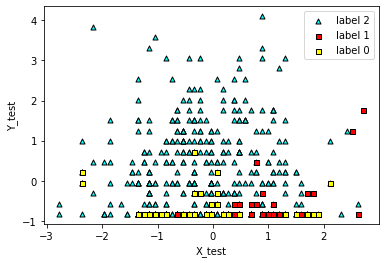

In [43]:
y_pred_c50 = model_C50.predict(X_test)
plot_points(X_test, y_pred_c50)
accuracy = accuracy_score(y_test, y_pred_c50)
recall = recall_score(y_test, y_pred_c50, average="macro")
precision = precision_score(y_test, y_pred_c50,average="macro")
cf_matrix = confusion_matrix(y_test, y_pred_c50)

print("Accuracy    : ", accuracy)
print("Recall      : ", recall)
print("Precision   : ", precision)
print("Confusion Matrix: ", cf_matrix)

In [45]:
from keras.utils.vis_utils import plot_model
plot_model(X_test, y_pred_c1, model_C1)

AttributeError: ignored